In [75]:
import pandas as pd 
import numpy as np
import seaborn as sn
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [76]:
dataset = pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

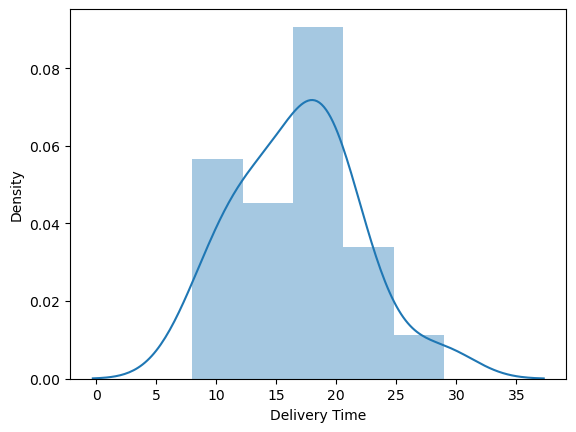

In [78]:
sns.distplot(dataset['Delivery Time'])

C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

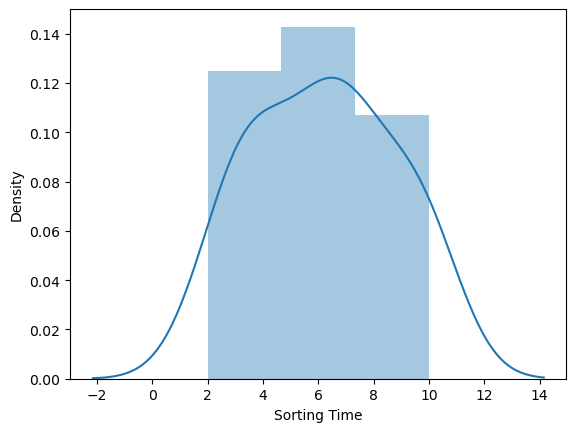

In [79]:
sns.distplot(dataset['Sorting Time'])

# Feature Engineering 

In [80]:
dataset = dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis 

In [81]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

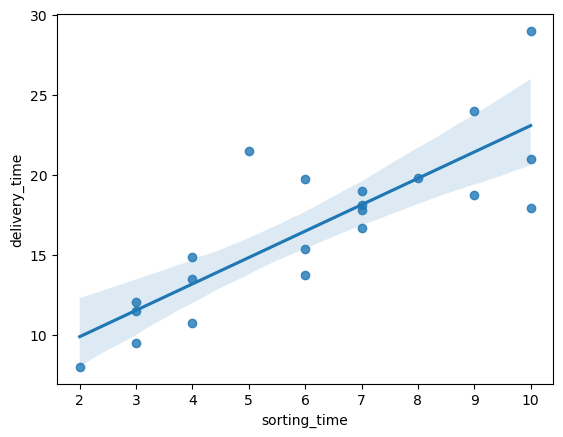

In [82]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Model Building

In [83]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

# Model Testing 

In [84]:
# Finding Coefficient parameters 
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [85]:
# Finding tvalues and pvalues 
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

# Model Predictions 

In [86]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [87]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [88]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [89]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Transformation

# 1. Squareroot Transformation 

In [90]:
dataset_sqr_sort=np.sqrt(dataset["sorting_time"])
dataset_sqr_sort

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: sorting_time, dtype: float64

In [91]:
dataset_sqr=pd.DataFrame((dataset_sqr_sort,dataset["delivery_time"])).T
dataset_sqr

,sorting_time,delivery_time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

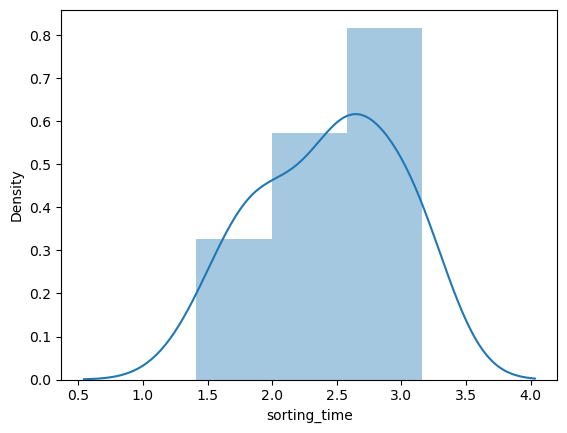

In [92]:
sns.distplot(dataset_sqr["sorting_time"])

In [93]:
model_sqrt=sm.ols(("delivery_time~sorting_time"),data=dataset_sqr).fit()

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 12 May 2023   Prob (F-statistic):           3.98e-06
Time:                        12:51:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [96]:
y_pred_sqrt=(-2.518837)+(7.936591)*(dataset_sqr["sorting_time"])
y_pred_sqrt

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
Name: sorting_time, dtype: float64

In [97]:
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [98]:
print("r2score",r2_score(dataset_sqr["delivery_time"],y_pred_sqrt))

r2score 0.6958062276308643


In [99]:
print("MAE",mean_absolute_error(dataset_sqr["delivery_time"],y_pred_sqrt))

MAE 2.047327133749685


# Model perform approximately same before squareroot transformation and after transformation

# Model performance is approximately 69.5%

# model performance is 69% is same as squareroot transformance

# 2.Log Transformation

In [100]:
dataset_log_sort=np.log(dataset["sorting_time"])
dataset_log_sort

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: sorting_time, dtype: float64

In [101]:
dataset_log=pd.DataFrame((dataset_log_sort,dataset["delivery_time"])).T
dataset_log

,sorting_time,delivery_time
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

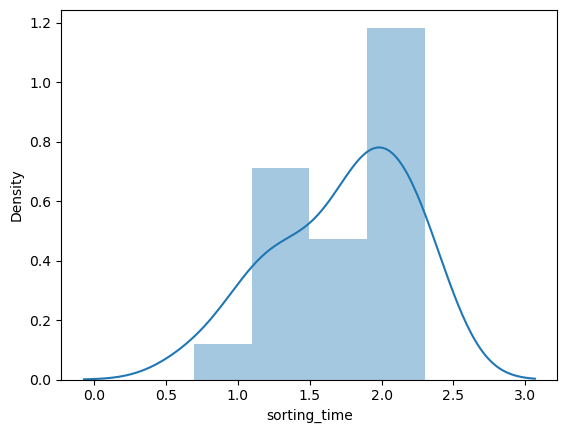

In [102]:
sn.distplot(dataset_log["sorting_time"])

In [103]:
model_log=sm.ols(("delivery_time~sorting_time"),data=dataset_log).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.64e-06
Time:                        12:51:20   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1597      2.455      0.472      0.642      -3.978       6.297
sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model_log.params

Intercept       1.159684
sorting_time    9.043413
dtype: float64

In [105]:
y_pred_log=(1.159684)+(9.043414)*(dataset_log["sorting_time"])
y_pred_log

0     21.982914
1     13.696518
2     17.363307
3     21.030096
4     21.982914
5     17.363307
6     18.757355
7     11.094890
8     21.982914
9     21.030096
10    19.964935
11    13.696518
12    18.757355
13    11.094890
14    11.094890
15    13.696518
16    17.363307
17    18.757355
18     7.428101
19    18.757355
20    15.714497
Name: sorting_time, dtype: float64

In [106]:
print("r2score",r2_score(dataset_log["delivery_time"],y_pred_log))

r2score 0.695443461132337


In [107]:
print("MAE",mean_absolute_error(dataset_log["delivery_time"],y_pred_log))

MAE 2.0473759842778967


# 3. Expoential Transformation 

In [108]:
dataset_exp_sort=np.exp(dataset["sorting_time"])
dataset_exp_sort

0     22026.465795
1        54.598150
2       403.428793
3      8103.083928
4     22026.465795
5       403.428793
6      1096.633158
7        20.085537
8     22026.465795
9      8103.083928
10     2980.957987
11       54.598150
12     1096.633158
13       20.085537
14       20.085537
15       54.598150
16      403.428793
17     1096.633158
18        7.389056
19     1096.633158
20      148.413159
Name: sorting_time, dtype: float64

In [109]:
dataset_exp=pd.DataFrame((dataset_exp_sort,dataset["delivery_time"])).T
dataset_exp

,sorting_time,delivery_time
0,22026.465795,21.00
1,54.598150,13.50
2,403.428793,19.75
3,8103.083928,24.00
4,22026.465795,29.00
5,403.428793,15.35
6,1096.633158,19.00
7,20.085537,9.50
8,22026.465795,17.90
9,8103.083928,18.75


C:\Users\Sanjeevani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

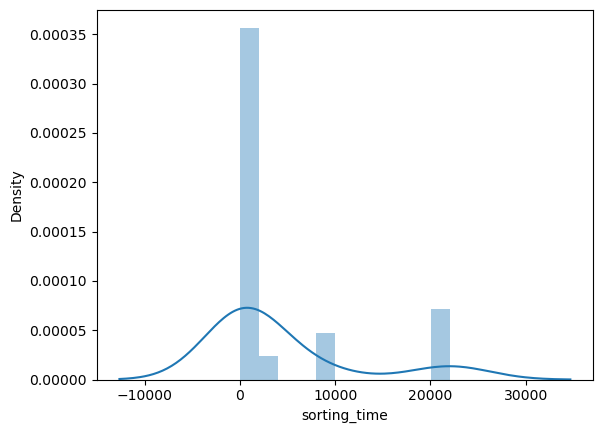

In [110]:
sn.distplot(dataset_exp["sorting_time"])

In [113]:
model_exp=sm.ols(("delivery_time~sorting_time"),data=dataset_exp).fit()
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Fri, 12 May 2023   Prob (F-statistic):            0.00396
Time:                        13:02:12   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.0836      1.047     14.406      0.000      12.892      17.275
sorting_time     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# CONCLUSION

In [ ]:
# 1.Pvalue<0.05 model is accpeted
# 2.coefficient == 1.64

In [ ]:
# Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64